In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
###2.RANDOM SAMPLE IMPUTATION 
# in this it will take a sample at random from the data and fill in the nan value 
# when should be used:it assumes that the data are missingcompletly at random 
# MCAR
df=pd.read_csv("../input/titanic-machine-learning-from-disaster/train.csv",usecols=["Age","Fare","Survived"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
df["Age"].isnull().sum()

177

In [7]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
df[df["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [9]:
def random_one(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ###pandas need to have same index in order to merge the data set
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [10]:
median=df.Age.median()
median

28.0

In [11]:
random_one(df,"Age",median)

In [12]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [13]:
a=print(df['Age_median']==df['Age_random'])

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Length: 891, dtype: bool


In [14]:
import seaborn as sns

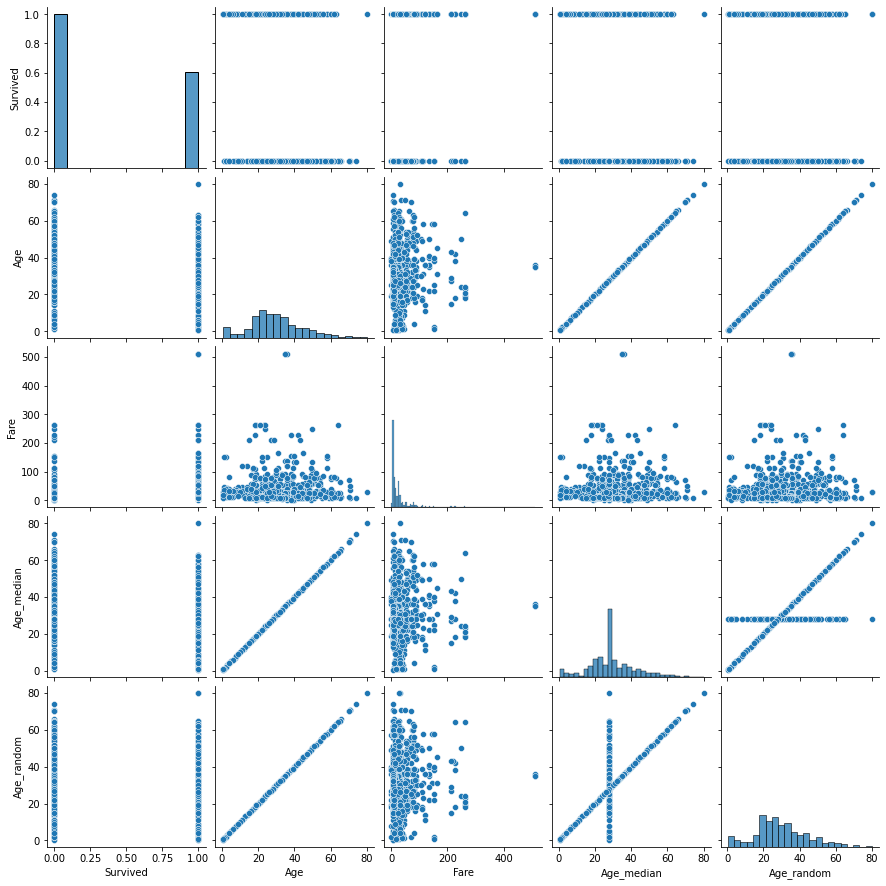

In [15]:
sns.pairplot(df)

In [16]:
df.describe()

,Survived,Age,Fare,Age_median,Age_random
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,29.361582,29.700348
std,0.486592,14.526497,49.693429,13.019697,14.563654
min,0.000000,0.420000,0.000000,0.420000,0.420000
25%,0.000000,20.125000,7.910400,22.000000,21.000000
50%,0.000000,28.000000,14.454200,28.000000,28.000000
75%,1.000000,38.000000,31.000000,35.000000,38.000000
max,1.000000,80.000000,512.329200,80.000000,80.000000


In [17]:
# so the variance of age and age_random  is similsr than that of age_median so we take random variable for the model 

**3.capturing the nan values with a new feature or  variables**

In [18]:
# it works well if the data are not missing completely at random
df1=pd.read_csv('../input/titanic-machine-learning-from-disaster/train.csv',usecols=["Age","Fare","Survived"])
df1.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
import numpy as np
df1["Age_nan"]=np.where(df['Age'].isnull(),1,0)

In [20]:
df1.head(15)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [21]:
a=df1['Age'].median()
a

28.0

In [22]:
# advantages
# 1.easy to impliment
# 2.captures the importance of missing values
# disadvantages
# 1.creating additional values (curse of dimensoinality)
df1.fillna(a,inplace=True)

In [23]:
df1.head(5)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


**4.END OF DISTRIBUTION IMPUTATION**

1. 

In [24]:
df2=pd.read_csv('../input/titanic-machine-learning-from-disaster/train.csv',usecols=["Age","Fare","Survived"])
df2.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

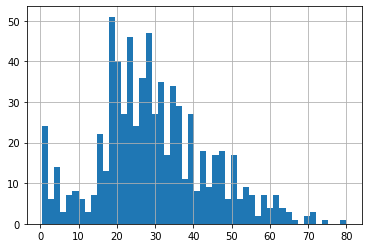

In [25]:
df2.Age.hist(bins=50)

In [26]:
# +3 standard deviation
extreme=df2.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

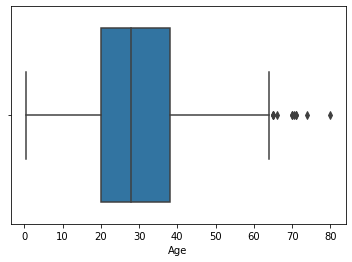

In [27]:
# to see the outliers 
sns.boxplot('Age',data=df2)

In [28]:
def impute_nan(df2,variable,median,extreme):
    df2[variable+'_end_distribution']=df[variable].fillna(extreme)
    df2[variable].fillna(median,inplace=True)

In [29]:
median=df2["Age"].median()
median

28.0

In [30]:
impute_nan(df2,'Age',median,extreme)

In [31]:
df2.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

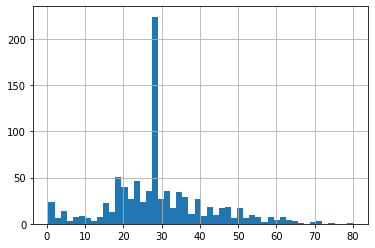

In [32]:
df2['Age'].hist(bins=50)
# huge distortion in the data 

<AxesSubplot:>

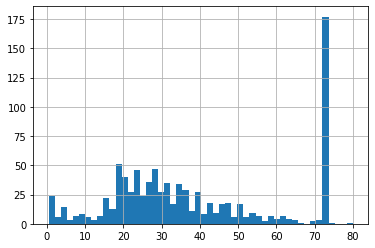

In [33]:
df2['Age_end_distribution'].hist(bins=50)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_end_distribution'>

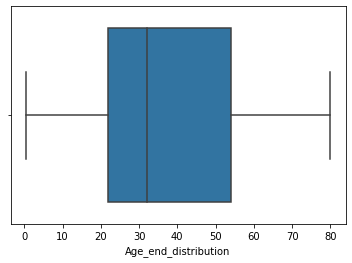

In [34]:
sns.boxplot('Age_end_distribution',data=df2)